In [62]:
from __future__ import print_function, division, absolute_import

import os

%matplotlib inline
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.time import Time, TimeDelta
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.units as u
from scipy.interpolate import interp1d
from cycler import cycler

from emissionline import emissionline

In [63]:
matplotlib.rc?

In [64]:
matplotlib.rc("axes",prop_cycle=cycler('color',
                                       cm.winter(np.linspace(0,1,25))),
             labelsize=14)
matplotlib.rc("font",size=14)

In [65]:
def calc_sn(w,f,v):
    halpha = (w>6555) & (w<6575)
    tio = (w>7000) & (w<7200)

    s2n = f/v

#     print("Halpha",np.median(s2n[halpha]),"TiO",np.median(s2n[tio]))

In [66]:
def read_mdm(filename,to_plot=False):
    with fits.open(filename) as spec:
#             print(spec.info())
#             print(spec[0].data)
        
            flux = spec[0].data[0][0]

            w0 = np.float(spec[0].header["CRVAL1"])
            wi = np.int(spec[0].header["CRPIX1"])
            wstep = np.float(spec[0].header["CD1_1"])
            w00 = (0-wi)*wstep + w0
            lf = len(flux)
            wavelength = np.arange(w00,w00+(lf-1)*wstep,wstep)
            while len(wavelength)<lf:
                wavelength = np.append(wavelength,
                                       wavelength[-1]+wstep)

            var = spec[0].data[3][0]
#             print(len(wavelength), len(flux), len(var))

#             print("sec(z) =",spec[0].header["AIRMASS"],
#                   "HA =",spec[0].header["HA"])
            
            if to_plot is True:
                plt.figure(figsize=(10,7))
                for i in range(4):
                    plt.plot(wavelength,spec[0].data[i][0],
                             label="row {0}".format(i))
                    plt.yscale("log")
                    plt.ylim(1e-16,1e-12)
                    plt.xlim(6000,8000)
                    plt.legend(loc="best")
            
#             print(spec[0].header["DATE-OBS"]+" "+spec[0].header["TIME-OBS"])
            tstart = spec[0].header["DATE-OBS"]+" "+spec[0].header["TIME-OBS"]
#             thalf = TimeDelta(spec[0].header["EXPTIME"]/2, format='sec')
#             exp_center = tstart + thalf
                    
    return wavelength, flux, var, tstart# exp_center

In [67]:
def plot_spec(w,f,v,ax=None,wmin=6500,wmax=7500):
    
    if ax is None:
        plt.figure()
        ax = plt.subplot(111)
    
    wreg = (w<=wmax) & (w>=wmin)
    
    ax.errorbar(w[wreg],f[wreg],v[wreg],capsize=0,alpha=0.5)

    fmin,fmax = min(f[wreg])*0.99,max(f[wreg])*1.01
    ax.set_ylim(fmin,fmax)
    ax.set_xlim(wmin,wmax)    
    ax.set_xlabel("wavelength")
    ax.set_ylabel("flux")


In [68]:
w,f,v,t = read_mdm(os.path.expanduser("~/Dropbox/data/MDM_reduced/20180112/finals/trim.KW563.fits"))

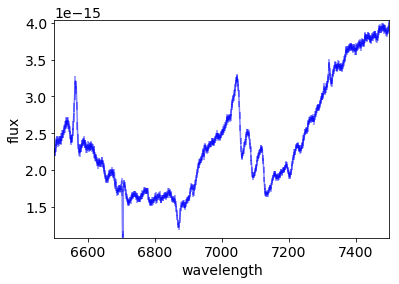

In [69]:
plot_spec(w,f,v)

In [70]:
halpha = (w>6555) & (w<6575)
tio = (w>7000) & (w<7200)

s2n = f/v

print(np.median(s2n[halpha]),np.median(s2n[tio]))

48.54562 54.986595


(1e-15, 1.6e-14)

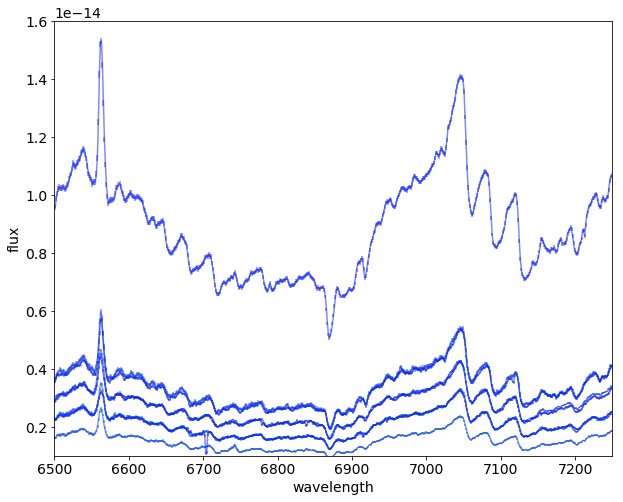

In [71]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in np.arange(12,20):
    fname = os.path.expanduser("~/Dropbox/data/MDM_reduced/201801{0}/finals/trim.KW563.fits".format(i))
    if os.path.exists(fname) is False:
        fname = fname.replace(".fits","_comb.fits")
    if os.path.exists(fname) is True:
        w,f,v,t = read_mdm(fname)
        plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
    
#     print("\n")
    
ax.set_ylim(1e-15,1.6e-14)
    

(6520, 6600)

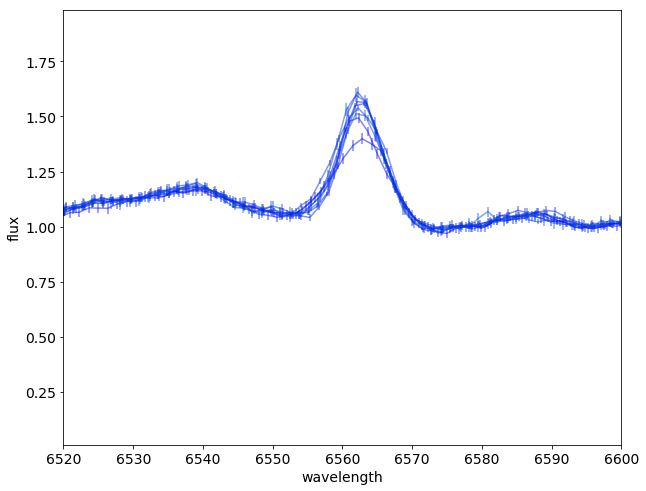

In [72]:

plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in np.arange(12,20):
    fname = os.path.expanduser("~/Dropbox/data/MDM_reduced/201801{0}/finals/trim.KW563.fits".format(i))
    if os.path.exists(fname) is False:
        fname = fname.replace(".fits","_comb.fits")
    if os.path.exists(fname) is True:
        w,f,v,t = read_mdm(fname)
        norm_reg = (w>6570) & (w<6580)
        norm_by = np.median(f[norm_reg])
        plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6000,wmax=9000)

    
#     print("\n")
    
# ax.set_ylim(1e-15,1.6e-14)
ax.set_xlim(6520,6600)
      

In [79]:
high_cadence = ["KW563", "JS283", "HSHJ272", "JS706", 
                "JC143","JS391","JS414","JS329","JS315"]

In [80]:
line_start, line_end = 6552, 6572

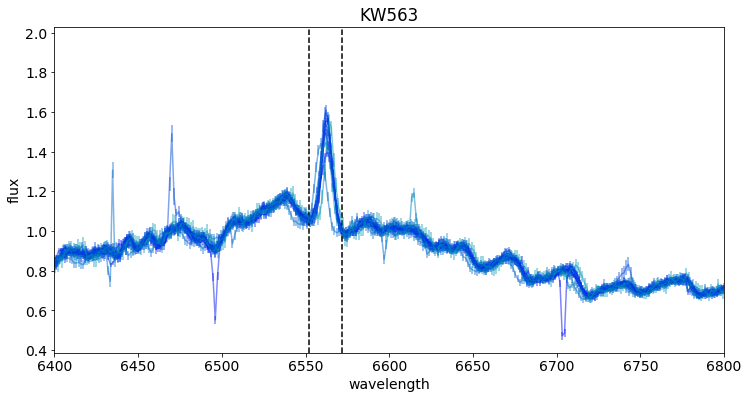

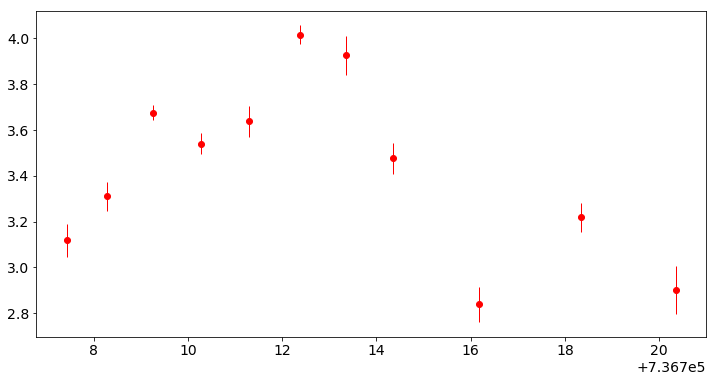

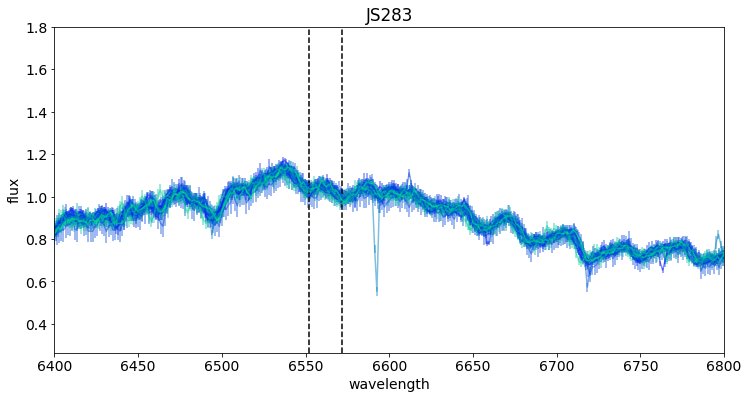

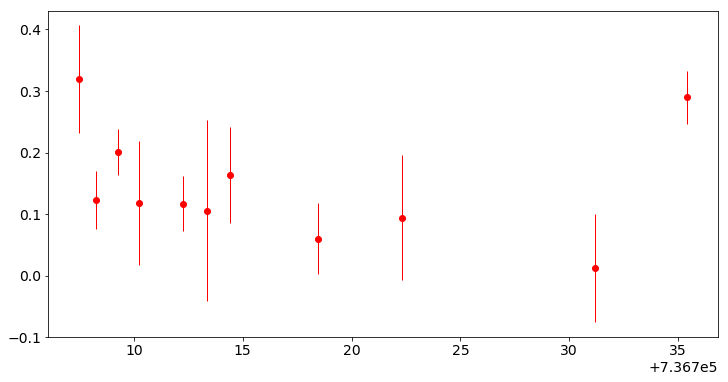

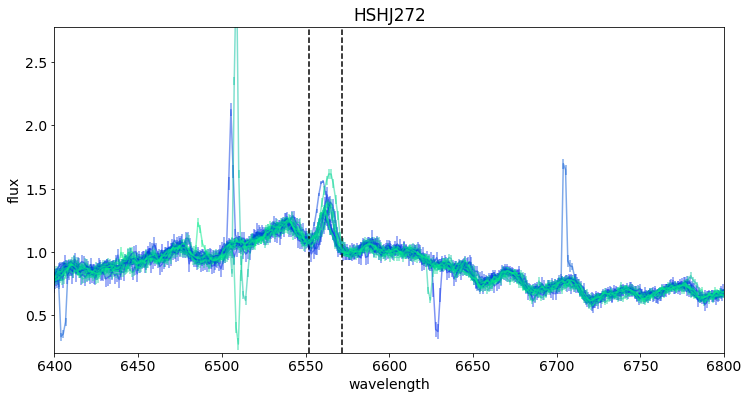

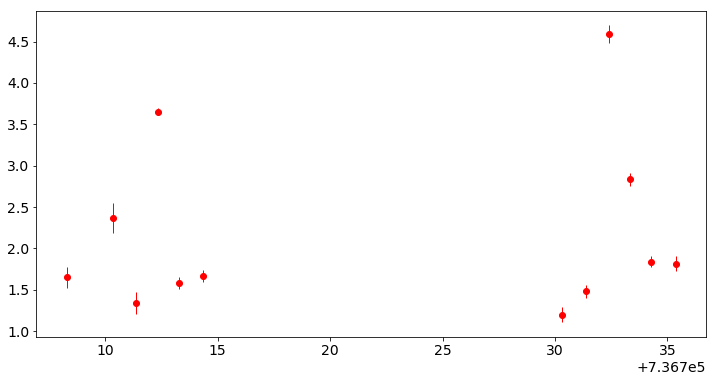

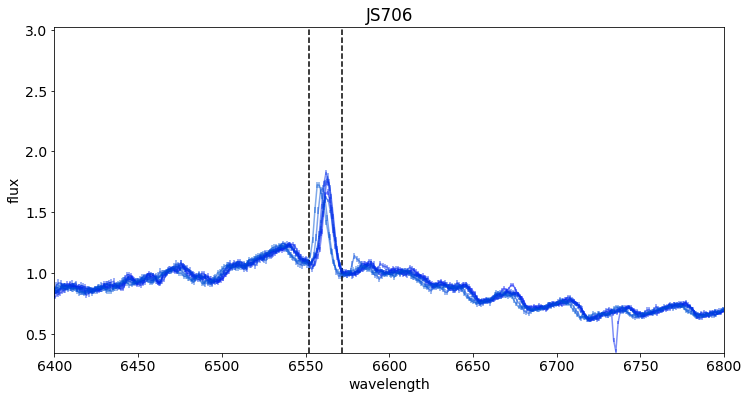

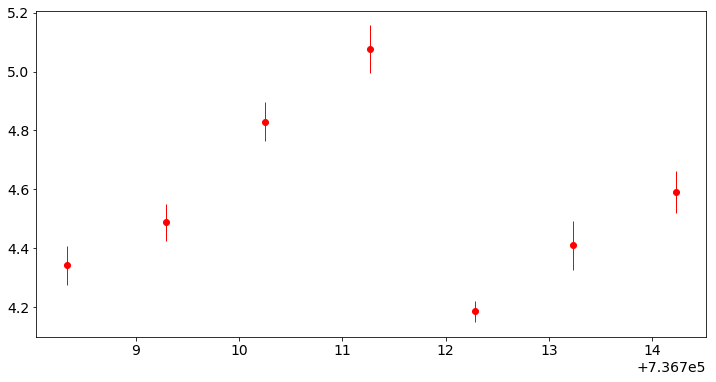

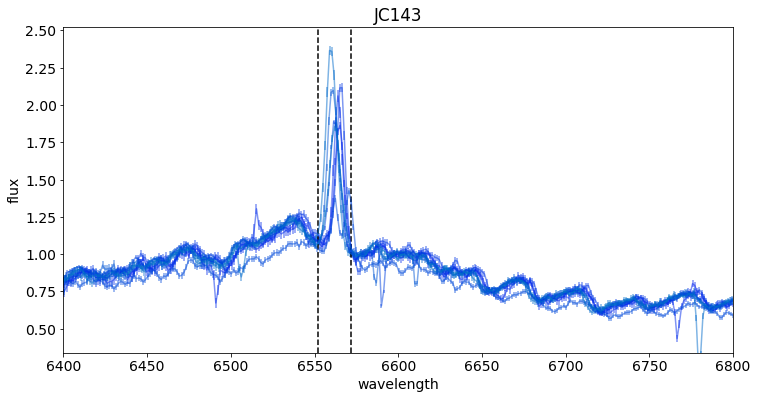

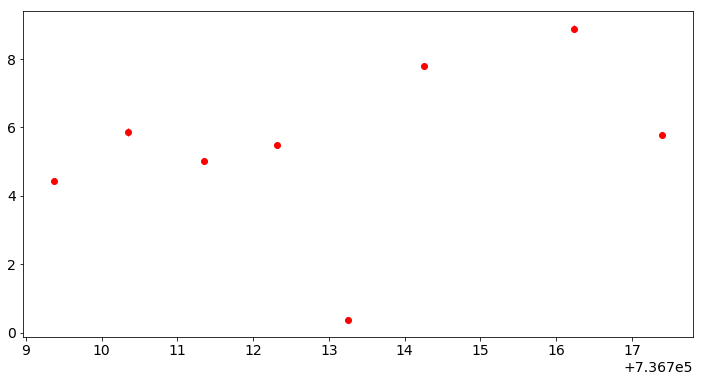

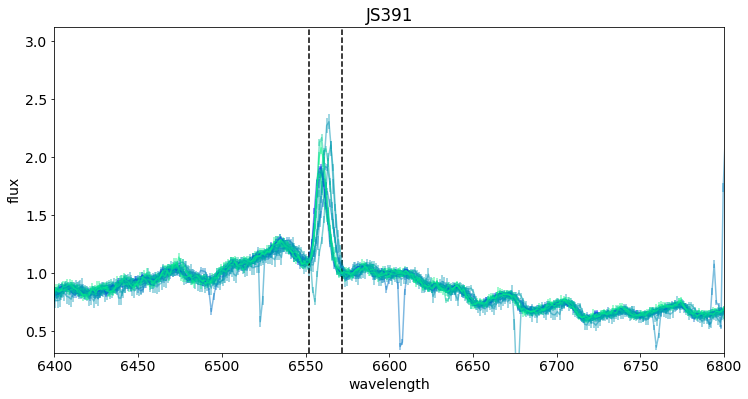

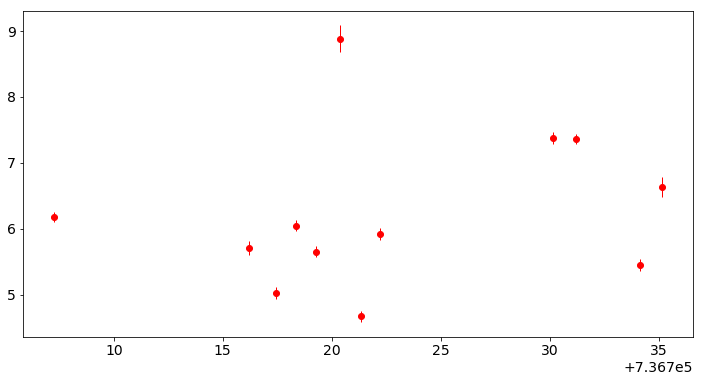

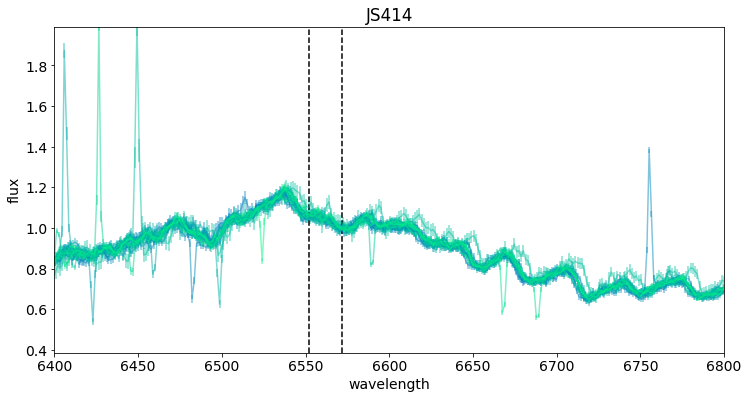

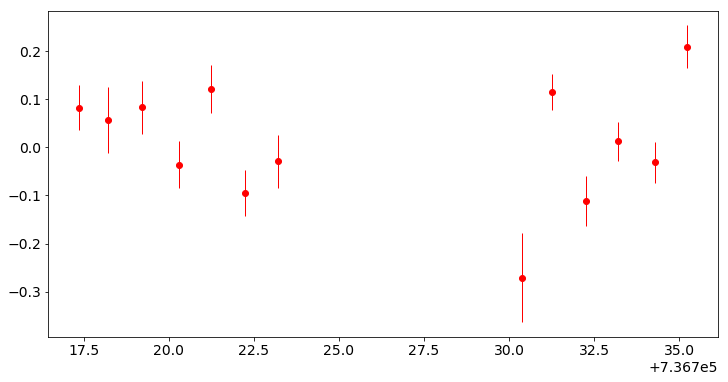

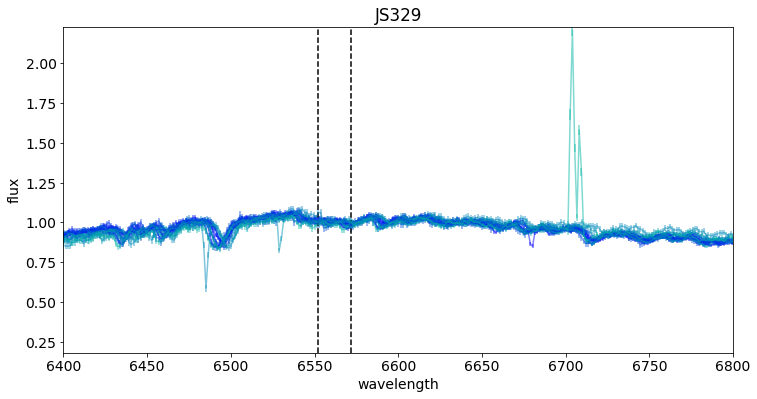

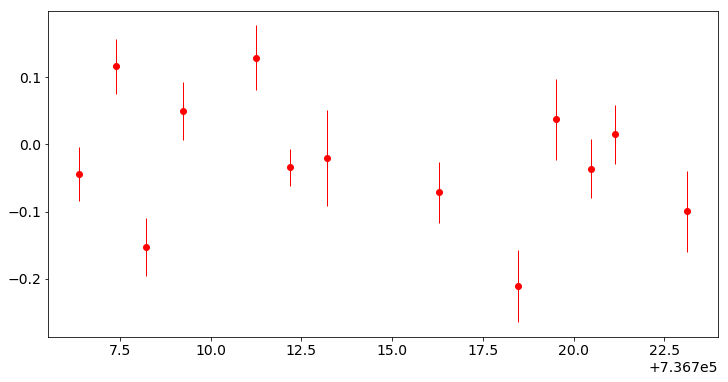

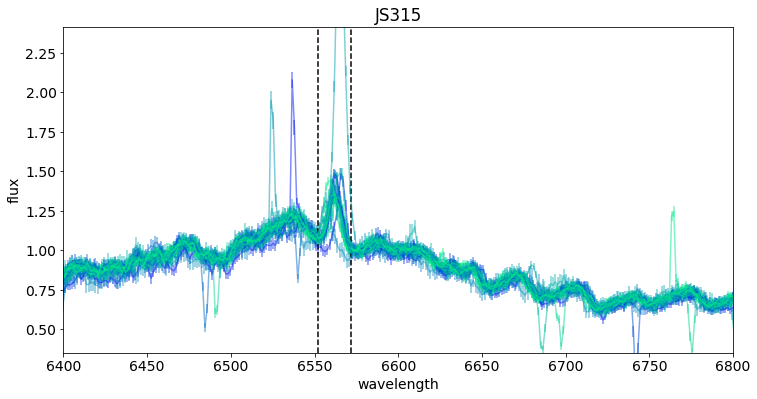

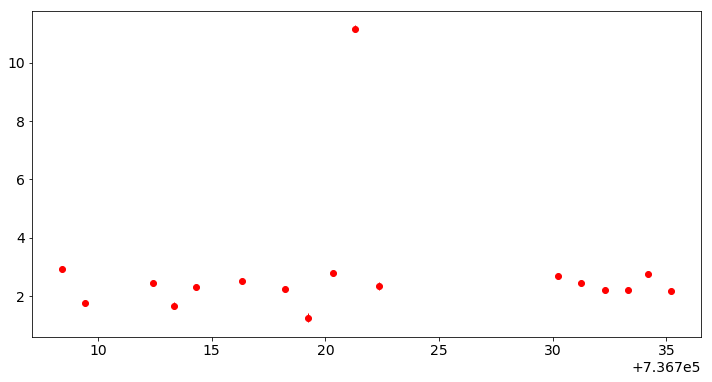

In [81]:
tday = np.append(["01-{0}".format(i) for i in np.arange(11,29)],
                 ["02-0{0}".format(i) for i in np.arange(4,10)])


for name in high_cadence:
    plt.figure(figsize=(12,6))
    ax = plt.subplot(111)
    
    ew = np.zeros(len(tday))*np.nan
    ewe = np.zeros(len(tday))*np.nan
    t = []

    for i,td in enumerate(tday):
        fname = os.path.expanduser("~/Dropbox/data/MDM_reduced/2018{0}/finals/trim.{1}.fits".format(td.replace("-",""),name))
        if os.path.exists(fname) is False:
            fname = fname.replace(".fits","_comb.fits")
        if os.path.exists(fname) is False:
            fname = fname.replace("_comb.fits",".1.fits")
        if os.path.exists(fname) is True:
            w,f,v,tval = read_mdm(fname)
            norm_reg = (w>6570) & (w<6580)
            norm_by = np.median(f[norm_reg])
            plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6000,wmax=9000)
            
            ew[i], ewe[i], _, _ = emissionline(w, f, v, 
                                           6545, 6550, 
                                           6570, 6575,
                                           6555, 6570)
            t.append(tval)
        else:
            t.append("2018-{0} 08:00:00".format(td))
            ax.plot([],[])
            continue
            
    t = Time(t,format="iso",scale="utc")
    ax.set_xlim(6400,6800)
    ax.set_title(name)
    
    ax.axvline(line_start,linestyle="--",color="k")
    ax.axvline(line_end,linestyle="--",color="k")
    
    plt.figure(figsize=(12,6))
    ax = plt.subplot(111)

    ax.errorbar(t.plot_date,ew,ewe,color="r",marker='o',
                linewidth=0,elinewidth=1)

In [82]:
ewHa, ewerr, tot_a, tot_err = emissionline(w, f, v, 
                                           6545, 6550, 
                                           6570, 6575,
                                           6555, 6570)

In [83]:
ewHa

2.1764861586227644

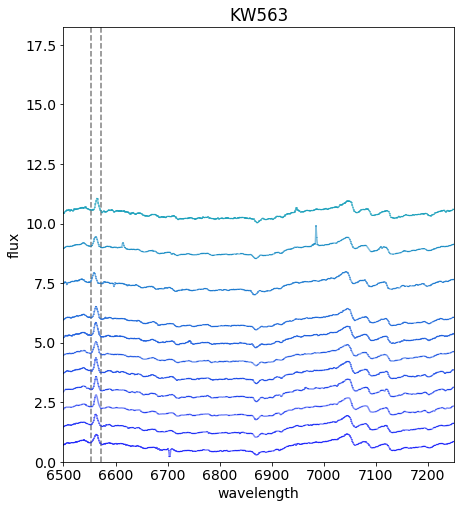

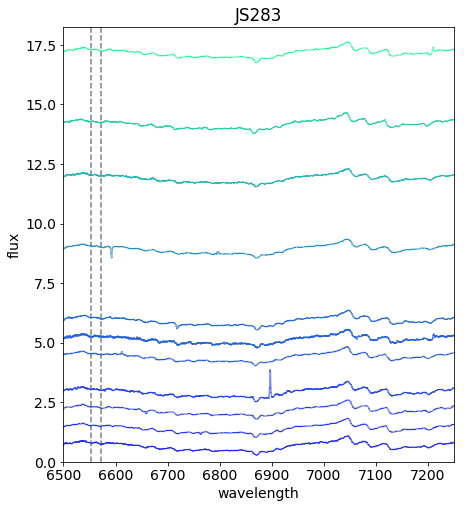

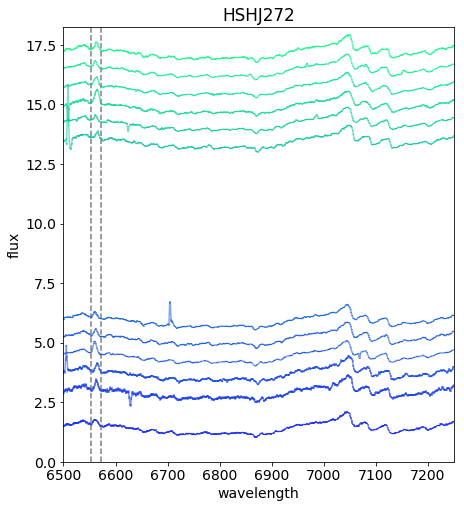

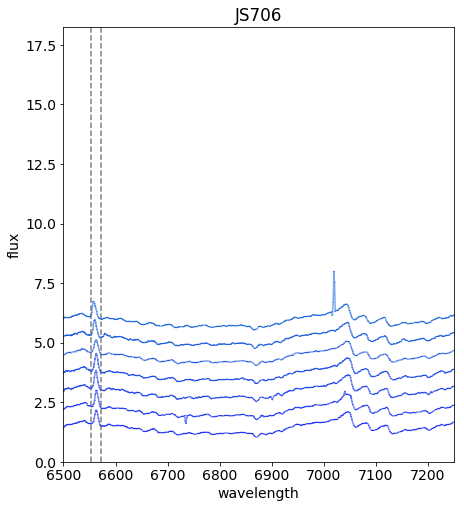

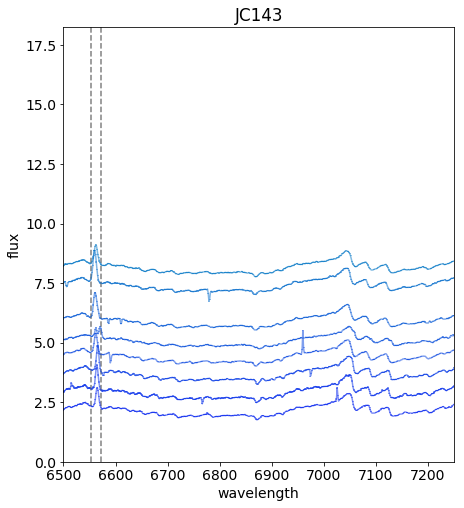

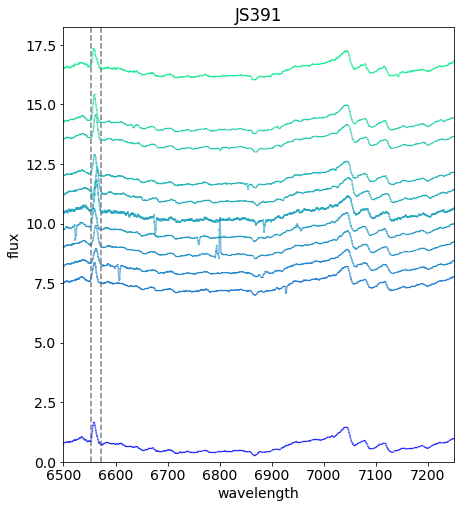

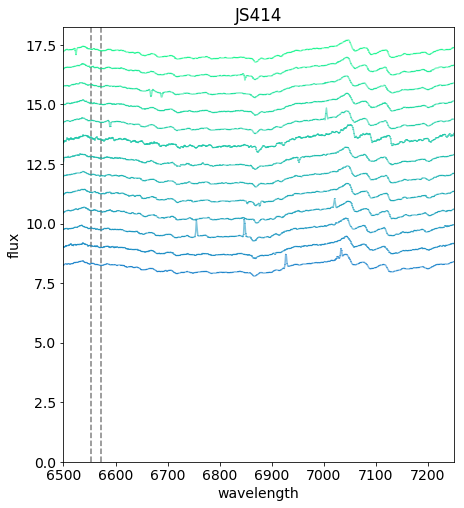

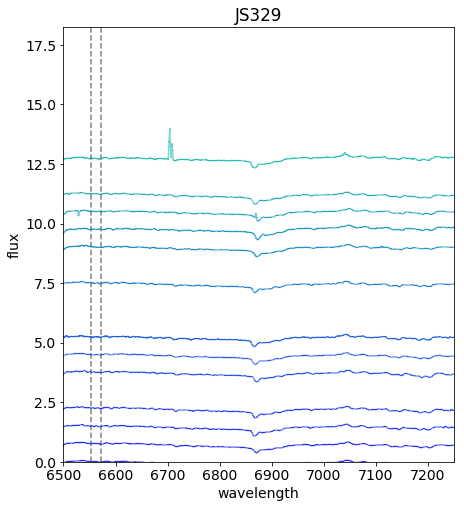

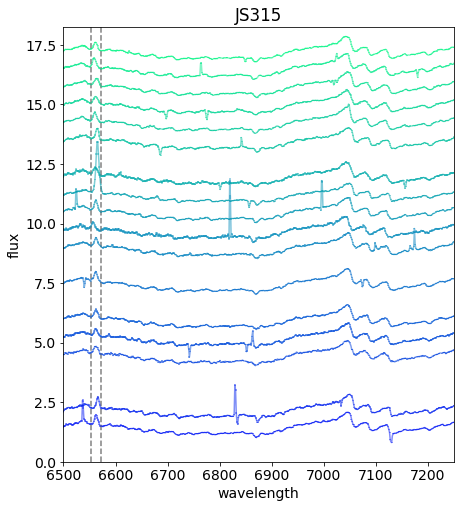

In [85]:
tday = np.append(["01-{0}".format(i) for i in np.arange(11,29)],
                 ["02-0{0}".format(i) for i in np.arange(4,10)])

for name in high_cadence:
    plt.figure(figsize=(7,8))
    ax = plt.subplot(111)
    
    ew = np.zeros(len(t))*np.nan
    ewe = np.zeros(len(t))*np.nan


    for i,day in enumerate(tday):

        fname = os.path.expanduser("~/Dropbox/data/MDM_reduced/2018{0}/finals/trim.{1}.fits".format(day.replace("-",""),name))
        if os.path.exists(fname) is False:
            fname = fname.replace(".fits","_comb.fits")
        if os.path.exists(fname) is True:
            w,f,v,t = read_mdm(fname)
            norm_reg = (w>6570) & (w<6580)
            norm_by = np.median(f[norm_reg])
            plot_spec(w,(f/norm_by)+(i*0.75-1),v/norm_by,
                      ax=ax,wmin=6000,wmax=9000)
            
#             ew[i], ewe[i], _, _ = emissionline(w, f, v, 
#                                            6545, 6550, 
#                                            6570, 6575,
#                                            6555, 6570)
        else:
            ax.plot([],[])
            
        ax.set_ylim(0,i*0.75+1)

    ax.set_xlim(6500,7250)
    ax.set_title(name)
    
    ax.axvline(line_start,linestyle="--",color="grey")
    ax.axvline(line_end,linestyle="--",color="grey")
    plt.savefig(os.path.expanduser("~/Dropbox/talks/hypra figs/halpha_series_{0}.pdf".format(name)),
                bbox_inches="tight")    
#     break